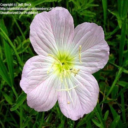

In [13]:
import torchvision
import torch
from PIL import Image

# Vector of zeros of size 5
size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_data = torchvision.datasets.Flowers102("./flowers", "train", transform=transform, download=True)
test_data = torchvision.datasets.Flowers102("./flowers", "test", transform=transform, download=True)   

def visualize_image(img: torch.Tensor):
    return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())
visualize_image(train_data[1][0])

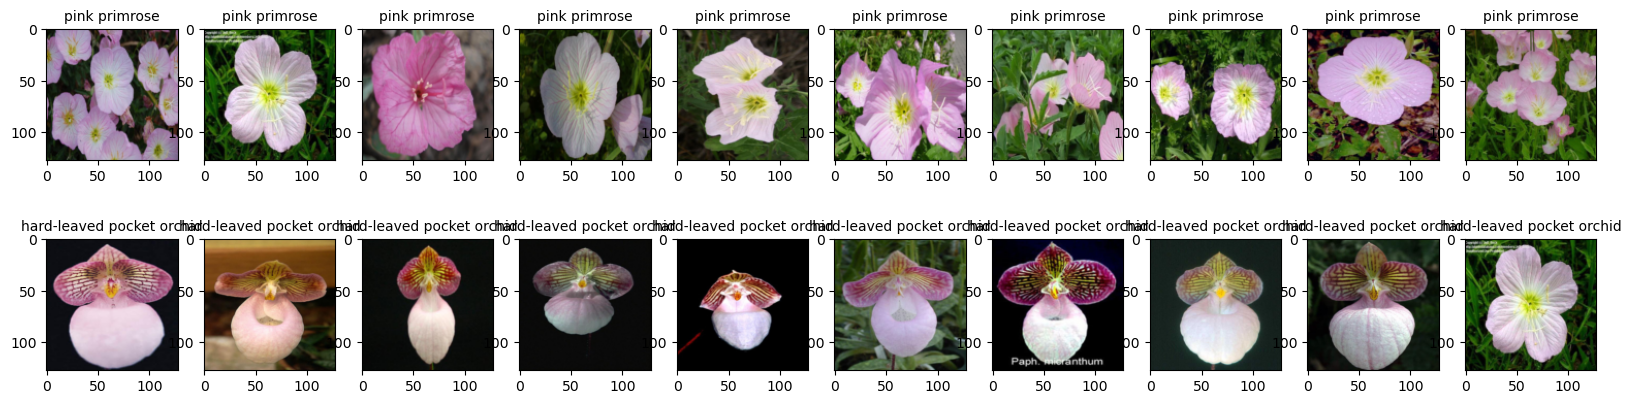

In [14]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(2, 10, figsize=(20, 5))
for i, (im, l) in enumerate(list(train_data)[:20]):
    ax[i // 10, i % 10].set_title(train_data.classes[l], fontsize=10)
    ax[ i // 10, i % 10].imshow(visualize_image(im))
plt.imshow(visualize_image(train_data[1][0]))

class_01 = list(train_data)[:20]

**Nearest Neighbor Classifier**

In [18]:
def nn_classifier(x):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    return min(dist)[1]

nn_classifier(test_data[0][0])
accuracy = sum(nn_classifier(x) == l for x, l in list(test_data)[:20]) / 20

In [20]:
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 40.00%


**K Nearest Neighbor Classifier**

In [24]:
def knn_classifier(x, k=3):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    return (sorted(k_closest)[k//2])
    # return min(dist)[1]

knn_classifier(test_data[0][0])
accuracy = sum(knn_classifier(x) == l for x, l in list(test_data)[:20]) / 20
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 50.00%


**K Nearest Neighbor Regression**

In [27]:
def knn_regression(x, k=3):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    return torch.mean(torch.tensor(k_closest).float())

knn_regression(test_data[3][0])

tensor(0.6667)